In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import random
from skimage import io

In [2]:
def distance(point, data):
    return np.sqrt(np.sum((point - data) ** 2, axis=1))

In [3]:
class KMeans:
    def __init__(self, n_clusters, max_iter, seed=1):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.rand = random.Random(seed)
    
    def fit(self, X):
        self.centroids = [self.rand.choice(X)]
        for _ in range(self.n_clusters-1):
            dists = np.sum([distance(centroid, X) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
            self.centroids += [X[new_centroid_idx]]

        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            print(iteration)
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X:
                dists = distance(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = distance(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

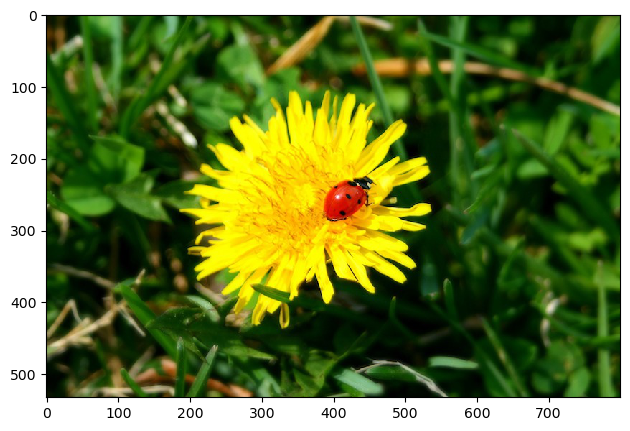

In [4]:
img = io.imread('ladybug.png')
io.imshow(img)

In [5]:
img.shape

(533, 800, 3)

In [6]:
rows = img.shape[0]
cols = img.shape[1]
img = img.reshape(rows * cols, 3)
img.shape

(426400, 3)

In [7]:
img

array([[25, 29,  2],
       [24, 28,  1],
       [24, 29,  0],
       ...,
       [10, 58,  0],
       [ 5, 52,  0],
       [ 2, 48,  0]], dtype=uint8)

In [8]:
clf = KMeans(16, 100)
clf.fit(img)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [9]:
centers, labels = clf.evaluate(img)

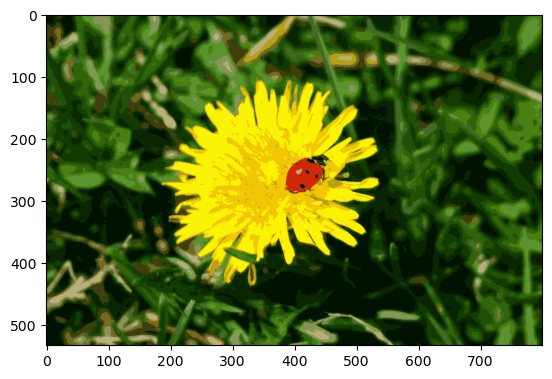

In [16]:
centers = np.array(centers)
segmented_image = centers
segmented_image = np.clip(segmented_image.astype('uint8'), 0, 255)
segmented_image = segmented_image.reshape(533, 800, 3)
plt.imshow(segmented_image)